### CNN using NMNIST

In [2]:
import keras

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
len(X_train), len(X_test)

(60000, 10000)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [44]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [16]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [30]:
X_train_reshaped.shape, X_test_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [40]:
X_train_reshaped[0].shape

(28, 28, 1)

In [57]:
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import keras.backend as K
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(X_train_reshaped[0].shape)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [59]:
# Step 8: Train our model using 5000 image ONLY(because work computer cannot handle more images) & test ysing 1500 images ONLY
X_train_reshaped_partial = X_train_reshaped[0:5000]
y_train_categorical_partial = y_train_cat[0:5000]

X_test_reshaped_partial = X_test_reshaped[0:1500]
y_test_categorical_partial = y_test_cat[0:1500]

print(X_train_reshaped_partial.shape, y_train_categorical_partial.shape)

(5000, 28, 28, 1) (5000, 10)


In [60]:
# Step 9: Fit the model with training data
history = model.fit(X_train_reshaped_partial, y_train_categorical_partial, batch_size=16, epochs=3, verbose=1,
                    validation_data=(X_test_reshaped_partial, y_test_categorical_partial))

Train on 5000 samples, validate on 1500 samples
Epoch 1/3
5000/5000 [==============================] - 17s 3ms/step - loss: 14.3405 - acc: 0.1100 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/3
5000/5000 [==============================] - 15s 3ms/step - loss: 14.4211 - acc: 0.1052 - val_loss: 14.4633 - val_acc: 0.1027
Epoch 3/3
5000/5000 [==============================] - 20s 4ms/step - loss: 14.5289 - acc: 0.0986 - val_loss: 14.4633 - val_acc: 0.1027


In [48]:
history.history

{'val_loss': [14.613739697774252, 14.613739697774252, 14.570758110046386],
 'val_acc': [0.09333333335320154, 0.09333333335320154, 0.09600000001986822],
 'loss': [14.50532984008789, 14.577205372619629, 14.523073612976074],
 'acc': [0.0998, 0.0956, 0.0988]}

In [52]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

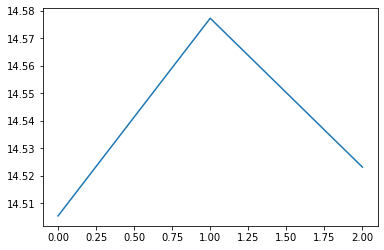

In [53]:
plt.plot(history.history['loss'])

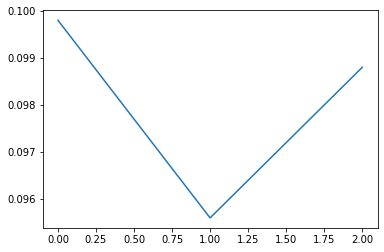

In [55]:

plt.plot(history.history['acc'])